In [44]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import graphviz

In [45]:
iris=load_iris()

In [46]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
X=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [48]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y=pd.DataFrame(data=iris.target,columns=['Type'])

In [50]:
y.head()

,Type
0,0
1,0
2,0
3,0
4,0


In [51]:
y.Type.value_counts()

0    50
1    50
2    50
Name: Type, dtype: int64

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [55]:
X_train.shape

(135, 4)

In [56]:
X_test.shape

(15, 4)

In [57]:
X_train.var(), X_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64,
 sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [58]:
import tensorflow as tf

In [59]:
# one-hot-encoding
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [60]:
y_train[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [61]:
y_test[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [62]:
# girdi verilerini array yapısına çevir
X_train=X_train.values
X_test=X_test.values

In [63]:
X_train[:5]

array([[6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2]])

In [64]:
X_test[:5]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4]])

### Build Layers & Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [66]:
# Sequential nesnesi oluşturma
model=Sequential()
# Sequential: Layerları lineer olarak bir araya getirir.

In [67]:
# Oluşturulan nesneye layer ekleme
# 64 nörondan oluşan, aktivasyon fonskiyonu ReLu olan ve girdi sayısı 4 olan bir layer oluşturduk.

model.add(Dense(64,activation="relu",input_shape=X_train[0].shape)) # input layer
model.add(Dense(128,activation="relu")) # hidden1
model.add(Dense(128,activation="relu")) # hidden2
model.add(Dense(128,activation="relu")) # hidden3
model.add(Dense(64,activation="relu")) # hidden4
model.add(Dense(64,activation="relu")) # hidden5
model.add(Dense(64,activation="relu")) # hidden6
model.add(Dense(3,activation="softmax")) # output layer. softmax çoklu sınıflandırma problemleri için kullanılır.

# Dense: Oluşturulacak layerların birbiri ile tamamen bağlantılı olmasını sağlar. 
# Yani layerdeki bütün nöronlar bir önceki layerdaki bütün nöronlara bağlanır.
# softmax: Çoklu sınıflandırma problemleri için kullanılan bir aktivasyon fonskiyonudur.

In [69]:
X_train[0].shape

(4,)

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)               

In [34]:
# modelin derlenmesi
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
# adam: Bir optimizer'dır. Optimizer öğrenme oranını kontrol eder. Öğrenme boyunca öğrenme oranını ayarlanmasını sağlar.
# loss: kayıp fonsksiyonudur. categorical_crossentropy çoklu sınıflandırma için kullanılan bir kayıp fonsksiyonudur.

In [71]:
y_train.shape

(135, 3)

In [35]:
# build model
history= model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)
# modelin eğitim aşamasındaki geçmişini kaydetmek için history'e atadık.

# batch_size: Model eğitilirken kaçar örnek alınacağını belirler.
# epoch: Modelin kaç defa eğitim verisini göreceğini ifade eder.
# validation_split: Modeli eğitirken, modeli değerlendirmek için kullanılabilir. Modelin eğitimini iyileştirmek için kullanılır. 
# (örnek: parametre olarak 0.4 verirsek eğitim verisinin bu kadarlık kısmı validation için kullanılır.)

Epoch 1/10
4/4 [==============================] - 1s 55ms/step - loss: 1.0991 - acc: 0.3223 - val_loss: 1.1008 - val_acc: 0.1429
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0961 - acc: 0.3471 - val_loss: 1.0969 - val_acc: 0.1429
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0845 - acc: 0.5537 - val_loss: 1.0791 - val_acc: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0516 - acc: 0.6694 - val_loss: 1.0396 - val_acc: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 0.9760 - acc: 0.6694 - val_loss: 0.9616 - val_acc: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8408 - acc: 0.6694 - val_loss: 0.8437 - val_acc: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6629 - acc: 0.6694 - val_loss: 0.7192 - val_acc: 0.5000
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5212 - acc: 0.6694 - val_loss: 

In [36]:
# val_acc > acc olduğu için çok doğru bir sonuç değildir

In [37]:
import matplotlib.pyplot as plt

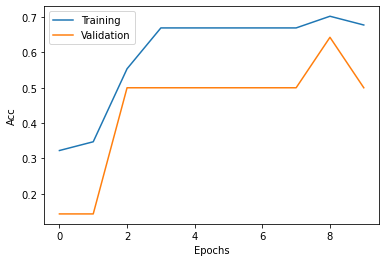

In [38]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

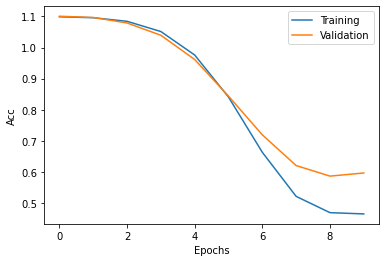

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

### Modelin Değerlendirilmesi

In [40]:
model.evaluate(X_test,y_test) # test verisindeki performans

1/1 [==============================] - 0s 11ms/step - loss: 0.4143 - acc: 0.8000


[0.4142880141735077, 0.800000011920929]

In [41]:
# Modeli iyileştirmek veya değiştirmek için layer,nöron ve epoch sayıları gibi nicelikler değişebilir